<center>

# Python for Quantum Mechanics: 
# Week 4 Tutorial

</center>

In [2]:
import numpy as np
import numpy.random as rnd

<center>

## Exercise 1: Multiplying Matrices

</center>

Create and multiply the following arrays using Numpy.

$ \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\ 0&1 & 0 & 0 & 0 & 0 \\
0&0 & 0 & 1 & 0 & 0 \\ 0&0 & 1 & 0 & 0 & 0 \\
0&0 & 0 & 0 & 1 & 0 \\ 0&0 & 0 & 0 & 0 & 1
\end{bmatrix} \times \begin{bmatrix}
1 \\ 0 \\ 1 \\ 0 \\ 1 \\ 0
\end{bmatrix} = \begin{bmatrix}
? \\ ? \\?\\?\\?\\?
\end{bmatrix}$

In [6]:
arr1 = np.eye(6, dtype = int)
arr1[2,3],arr1[3,2] = 1,1
arr1[2,2],arr1[3,3] = 0,0

arr2 = np.array([[1],[0],[1],[0],[1],[0]])

result = arr1@arr2
print(result)

[[1]
 [0]
 [0]
 [1]
 [1]
 [0]]


<center>

## Exercise 2: Slicing Arrays

</center>

Take the arrays from exercise 1 and slice them to then execute the following expression

$ \begin{bmatrix}
0 & 1 \\ 1&0
\end{bmatrix} \times \begin{bmatrix}
1 \\ 0
\end{bmatrix} = \begin{bmatrix}
? \\ ?
\end{bmatrix}$

In [7]:
arr1 = arr1[2:4,2:4]
arr2 = arr2[2:4]
print(arr1@arr2)

[[0]
 [1]]


<center>

## Exercise 3: Diagonalise

</center>

Using the eigenvector matrix $E$ of a random $(6,6)$ matrix $A$, diagonalise it with the formula

$$ D = E^{-1}AE$$

In [9]:
A = rnd.random((6,6))

eigval, E = np.linalg.eig(A)

D = np.linalg.inv(E)@A@E

print(np.round(D,3))

[[ 3.151-0.j     0.   -0.j    -0.   -0.j    -0.   +0.j     0.   -0.j
   0.   -0.j   ]
 [-0.   -0.j    -0.406-0.j    -0.   +0.j    -0.   -0.j     0.   -0.j
   0.   -0.j   ]
 [-0.   -0.j    -0.   -0.j     0.159+0.222j  0.   -0.j    -0.   +0.j
  -0.   -0.j   ]
 [-0.   +0.j    -0.   +0.j     0.   +0.j     0.159-0.222j  0.   -0.j
  -0.   +0.j   ]
 [ 0.   +0.j    -0.   -0.j    -0.   +0.j    -0.   -0.j     0.264+0.j
  -0.   -0.j   ]
 [ 0.   +0.j    -0.   -0.j     0.   +0.j     0.   -0.j    -0.   +0.j
   0.825+0.j   ]]


<center>

## Exercise 4: Normal Distribution

</center>

Create an array of size $10,000$ with a normal distribution with mean $100$ and standard deviation of $10$.

In [11]:
mu, sigma, size = 100, 10, 10000

norm_arr = rnd.normal(mu, sigma, size)

print(norm_arr)

print(np.mean(norm_arr))
print(np.std(norm_arr))
print(np.var(norm_arr))

[103.26502189 104.11701303 124.84097961 ... 110.5193989  116.04528832
  96.4244017 ]
100.15007744916308
10.109254414371156
102.19702481448269


Now create a random array, of integers between $0\rightarrow10,000$, of size $1,000$.

In [12]:
rarr = rnd.randint(0,10000,1000)
rarr = 10000*rnd.random(1000)
rarr = rnd.choice(np.arange(10000),1000,replace=False)

[4619  191 6668 7864  238 1593 7329 4275 4517 3241]


Using this random array, pull a random sample from that of the normal distribution.

In [14]:
radnom_sample = norm_arr[rarr]

Analyse this random_sample, find it's mean, std and variance.

In [15]:
print(np.mean(radnom_sample))
print(np.std(radnom_sample))
print(np.var(radnom_sample))

102.54494828170866
9.388962164515371
88.15261052670117


<center>

## Exercise 5: Linear Regression & Stochastic Gradient Descent

</center>

Use stochastic gradient descent to minimise the cost function for a linear least-square fit. Return the slope and y-intercept of the resulting line. Fit the following scattered data points (x,y).

In [20]:
m = 3
c = 2

x = np.arange(0,10,0.1)
y = m*x + c + 0.1*rnd.random(len(x))*(rnd.choice([-1,1]))

In [21]:
sample_size = int(len(x)/10)

rarr = np.sort(rnd.randint(0,len(x),sample_size))

x = x[rarr]
y = y[rarr]

print(x)

[0.4 1.2 2.4 2.4 2.5 4.8 6.1 8.1 8.3 9.9]


In [29]:
def cost(x,y,m,c):
    return 1/(len(x))*sum(i**2 for i in (y-(m*x+c)))

def m_grad(x,y,m,c):
    return -2/len(x)*sum(i for i in (x*(y-(m*x+c))))

def c_grad(x,y,m,c):
    return -2/len(x)*sum(i for i in (y-(m*x+c)))

In [30]:
def gradient_descent(x,y,guess, L, n_iter):
    for i in range(n_iter):
        guess[0], guess[1] = guess[0] - L*m_grad(x,y,guess[0],guess[1]),guess[1] - L*c_grad(x,y,guess[0],guess[1])
    return guess

In [31]:
guess = np.array([1.0,1.0])
L = 0.01
n_iter = 10000

print(gradient_descent(x,y,guess,L,n_iter))

[3.00088656 2.03740971]


<center>

## Exercise 6: Random Pi
    
</center>

Using `rnd.random()`, calculate $\pi$.

In [42]:
n = 1000000
print(4*sum(rnd.random(n)**2 + rnd.random(n)**2 < 1)/n)

3.139448


<center>

## Exercise 7: Random Walk
    
</center>

Write a compact algorithm using numpy array functionality to generate a random walk. Find the root-mean-squared distance against the steps taken.

In [43]:
import matplotlib.pyplot as plt

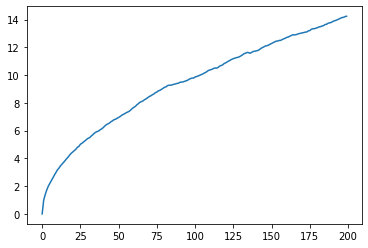

In [47]:
steps = 200
walks = 2000

y = np.zeros(steps)

Square_Sum = np.zeros(steps)

for j in range(walks):
    for i in range(1,steps):
        y[i] = y[i-1] + rnd.choice([-1,1])
        Square_Sum[i] += (y[i])**2

RMS = np.sqrt(Square_Sum/walks)

plt.plot(np.arange(steps), RMS)
plt.show()

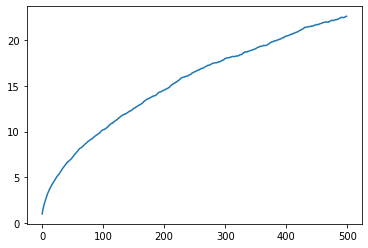

In [58]:
steps = 500
walks = 2000


y = np.cumsum(np.array(rnd.choice([-1,1],(walks,steps))),axis=1)

Square_Sum = np.sqrt(sum(y**2)/walks)

plt.plot(np.arange(steps), Square_Sum)
plt.show()

<center>

## Exercise 8: Quantum Random Walk
    
</center>

In [59]:
from scipy.linalg import expm

def adj_cycle(n):
    A = np.zeros((n,n))
    for x in range(n):
        A[x, (x+1)%n] = 1
        A[(x+1)%n, x] = 1
        
    return A

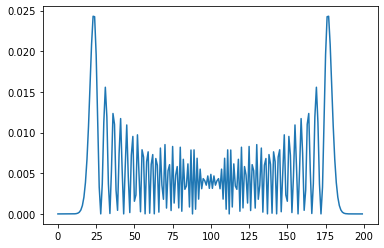

In [63]:
n = 200
t = 40

H = adj_cycle(n)
U = expm(-1j*H*t)

initial = np.zeros((n,1))
initial[n//2] = 1

initial = np.abs(U@initial)**2

plt.plot(initial)
plt.show()